Andy Snitgen  
Professor Karen Jin  
Comp 574 - Applied Computing II  
November 24, 2021  

## Milestone II - Analysis
```
This program will analyze the csv files created by Milestone I file
Input: .csv file containing API data collected in Milestone I 
Output: f'strings and plots showcasing the analyzed data
```
* The input file goes in the seventh line
    * The syntax is: df = pd.read_csv('data/**filename_here**.csv, skiprows=1)`

#### Import, read and create
```
This code block imports necessary libraries, reads the csv and displays the dataframe
Input: csv, the file contianing movie data from Milestone I
Ouput: df, the dataframe created from the csv
```
* Uses Libraries: Pandas, math, matplotlib, numpy

In [62]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

# Create the dataframe
df = pd.read_csv('data/StarWars_data.csv', skiprows=1)  # Change file to read in here
df

,Title,Year,Actor,US Box Office,International Revenue,Adjusted Revenue,Average Rating,IMDb Rating,Metacritic
0,Star Wars: Episode I - The Phantom Menace,1999,Ewan McGregor,"$474,544,677","$1,027,082,707","$1,673,170,748",58.0%,6.5 / 10,51%
1,Star Wars: Episode II - Attack of the Clones,2002,Hayden Christensen,"$310,676,740","$653,779,970","$986,302,856",59.5%,6.5 / 10,54%
2,Star Wars: Episode III - Revenge of the Sith,2005,Hayden Christensen,"$380,270,577","$868,390,560","$1,206,764,967",71.5%,7.5 / 10,68%
3,Star Wars: Episode IV - A New Hope,1977,Mark Hamill,"$460,998,507","$775,398,007","$3,472,657,081",88.0%,8.6 / 10,90%
4,Star Wars: Episode V - The Empire Strikes Back,1980,Mark Hamill,"$292,753,960","$538,375,067","$1,773,240,209",84.5%,8.7 / 10,82%
5,Star Wars: Episode VI - Return of the Jedi,1983,Mark Hamill,"$309,306,177","$475,106,177","$1,294,616,631",70.5%,8.3 / 10,58%
6,Star Wars: Episode VII - The Force Awakens,2015,Daisy Ridley,"$936,662,225","$2,068,455,677","$2,368,687,218",79.5%,7.9 / 10,80%
7,Star Wars: Episode VIII - The Last Jedi,2017,Daisy Ridley,"$620,181,382","$1,332,698,830","$1,475,701,601",77.0%,7.0 / 10,84%
8,Star Wars: Episode IX - The Rise of Skywalker,2019,Daisy Ridley,"$515,202,542","$1,074,144,248","$1,140,096,789",59.5%,6.6 / 10,53%
9,Rogue One: A Star Wars Story,2016,Felicity Jones,"$532,177,324","$1,056,057,720","$1,194,225,272",71.5%,7.8 / 10,65%


#### Adjust the dataframe to suit mathematical work
```
This code block changes in values applicable columns from strings to floats
Input: df, the unedited dataframe from the csv
Output: df, now updated for math, but harder for humans to read 
```
* The affect columns are: 'International Revenue', 'Adjusted Revenue', 'Average Rating'

In [63]:
# Turn 'International Revenue', 'Adjusted Revenue', and 'Average Rating' values from strings into floats for mathematics
df['International Revenue'] = df['International Revenue'].apply(lambda x: 1 if x == 'No Data' else float(x.replace(',', '').replace('$', '').replace(' (est.)', '')))
df['Adjusted Revenue'] = df['Adjusted Revenue'].apply(lambda x:  1 if x == 'No Data'  else float(x.replace(',', '').replace('$','')))
df['Average Rating'] = df['Average Rating'].apply(lambda x: float(x.replace('%', '')))



### Question: How much money does each film in the franchise make on average?
```
Uses built in functions mean and median to determine relevant information
```
* In addition, format functions are also used to convert floats to strings

<p> We will begin our analysis by checking to see how much an entry into the franchise makes on average.  This is the mean value, and has been calculated for both the nominal revenue and the same amount adjusted for inflation.  This is done to allow for a more accurate comparison with long running or older franchises where inflation can be a significant factor. The median, or middle value of the data set, has also been included.  This is because valuable information can be gleaned from the comparison of the two numbers.  If the mean and median are close it indicates that the franchise produces a consistent amount of money per entry.  However, if there is a large difference between the two it is indictive of a series with a greater variance.  Essentially, it is a franchise with some mega-hits or equally big flops. </p>

In [64]:
# Calculate the Mean and Median for 'International Revenue' and 'Adjusted Revenue'
columns = ['International Revenue', 'Adjusted Revenue']
for column in columns:    
    # Calculate the Mean, Median and Sum
    mean = df[column].mean()
    mean = "${:,.0f}".format(mean)
    median = df[column].median()
    median = "${:,.0f}".format(median)
    total = df[column].sum()
    total = "${:,.0f}".format(total)
    
    # Print the Results
    print(f'The {column} has:')
    print(f'        A Mean of: {mean}')
    print(f'        A Median of: {median}')
    print(f'        A Sum of: {total}')


The International Revenue has:
        A Mean of: $932,946,706
        A Median of: $868,390,560
        A Sum of: $10,262,413,770
The Adjusted Revenue has:
        A Mean of: $1,546,377,628
        A Median of: $1,294,616,631
        A Sum of: $17,010,153,904


### Question: What are the statistics associated with film quality?
```
Uses built in mean, median, and mode functions to determine standard deviation of the 'Average Rating' column
```
* Adds and then deletes new column 'Calculations'
    * This column's values are equal to the variance associated with each film's average rating
* The math.sqrt() function is used to change variance to standard deviation
<p> Now that we have a brief overview of the financial data from the franchise, we will take a closer examination of its average rating.  This column is the average of the IMDB user ratings an the Metacritic aggregate review score.  It should provide an insightful look at the overall quality of the franchise from both a critical and audience perspective.  The mean provides an average rating for all films in the series.  The median represents the middle of the data set, and the mode is the most common score.  The standard deviation is the average change from the mean.  A low standard deviation denotes a series of consistent quality.  In contrast, a high standard deviation results in a series with more variance; a franchise with many highs and lows. </p>

In [65]:
# Calculate the Mean, Median, and Mode of 'Average Rating'
column = 'Average Rating'
mean = df[column].mean()
median = df[column].median()
median = "{:,.0f}%".format(median)
mode = df[column].mode().iloc[0]
mode = "{:,.0f}%".format(mode)

# Calculate the Standard Deviation of 'Average Rating' 
df['Calculations'] = df['Average Rating'].apply(lambda x: (x - mean)*(x - mean))
total = df['Calculations'].sum()
variance = total / len(df)
standard_deviation = math.sqrt(variance)

# Format the results
df = df.drop('Calculations', axis=1)
mean = "{:,.2f}%".format(mean)
standard_deviation = "{:,.2f}%".format(standard_deviation)

# Print the Results
print(f'The {column} has:')
print(f'        A Mean of: {mean}')
print(f'        A Median of: {median}')
print(f'        A Mode of: {mode}')
print(f'        A Standard Deviation of: {standard_deviation}')

The Average Rating has:
        A Mean of: 71.36%
        A Median of: 72%
        A Mode of: 60%
        A Standard Deviation of: 9.74%


### Question: How has the quality of the franchise changed over time?
```
Uses numpy to calculate a trendline from the 'Average Rating' column and matplotlib.pyplot to display the graph
```
* numpy.polyfit() is used to create a list containing the [m , b] values in a trendline with equation y = mx + b
    * The third input argument is the order of the system; ie. a 2 value would have a squared x exponential
* numpy.poly1d() uses the polyfit list to create an equation and plot the trendline
* The if statements use the slope of the line (z[0]) to test against percent change

<p>While statistics about the quality of a franchise can be fascinating, one important aspect they neglect is how time has affected the series.  It is important to determine what direction a franchise is heading in.  To do this, we will graph a scatter plot of the average rating of each film against the year the film released.  We will then create a trendline from the plot to show how the quality has evolved over the course of the series.  If the average rating has changed less than 10% (+/- 5%), we will declare that the franchise has maintained a consistent quality.  However, if the quality has increased or decreased outside of that range, we will designate that the franchise has had a corresponding change in quality.</p> 

The franchise has seen review scores decline over time


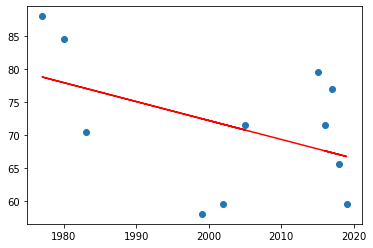

In [66]:
# Create the Plot
x = df['Year'].tolist()
y = df['Average Rating'].tolist()
plt.scatter(x, y)

# Create the Trendline
z = np.polyfit(x, y, 1)  # Gets values for trendline equation 
p = np.poly1d(z)  # Creates the trendline equation
plt.plot(x,p(x), color = 'red')

# Display the results
if z[0] > 0.05:
    print('The franchines has seen review scores improve over time')
elif z[0] < -0.05:
    print('The franchise has seen review scores decline over time')
else:
    print('The franchise has maintained a consistent quality over time')
plt.show()

### Question: Who is the most common lead actor?
```
Uses built in mode function to determine who the most common lead actor is
```
* The outer loop is used in the event that multiple actors have led the same number of films
    * In this event mode is returned as an indexed list saved as variable 'range'
* A Nested loop that iterates through entire dataframe is used
    * It contains a series of if statements that find years 

<p>Our examination doesn't have to focus on the franchise as a whole.  It many franchises, the lead actor can set the tone of the series throughout their tenure.  Knowing who starred in the most films is a valuable piece of information easily calculated with the mode function.  However, cases where multiple stars have made the same number of films, and thus have the same mode, must be accounted for.  This is a accomplished by saving their names to a list and then iterating through the list.  This allows the program to calculate the range of release years independtly for each actor.  It is useful because it provides a glimpse into the face of the franchise and the time they were at the helm.  </p>

In [67]:
# Calculate the mode of 'Actor' to satisfy qualitative requirement
range = df['Actor'].mode()

for actor in range:
    # Calculate the secondary data
    size = len(df.loc[df['Actor'] == actor])
    first = 99999
    last = 0
    for index, row in df.iterrows():
        if df.Actor[index] == actor:
            if df.Year[index] < first:
                first = df.Year[index]
            if df.Year[index] > last:
                last = df.Year[index]

    # Print the results
    print(f'The most common lead actor is: {actor}')
    print(f'Who made {size} films from {first} to {last}')

# Save the conclusion data
final_mode = range

The most common lead actor is: Daisy Ridley
Who made 3 films from 2015 to 2019
The most common lead actor is: Mark Hamill
Who made 3 films from 1977 to 1983


### Question: Who is the best lead actor?
```
Uses groupby and the mean function to find the actor with best average rating
```
* The groupby function associates each actor with the average rating of their films
* By iterating through that groupby, we can determine which actor has the highest rating
* We can use the same algorithm as before to determine the size and release years

<p> Of course, the most common actor is not always the best.  Franchises are often remembered for their highs, irregardless of the their lows.  To determine the best lead actor of a series, we will look at the average rating column comprised of the combination of IMDB user scores and Metacritic ratings.  USings a pandas groupby function we will organize the dataframe by lead actor.  At this point, a bar graph provides a useful comparison between the lead roles.  Since the groupby function returns a panda series that operates like a dictionary, it is trivial to iterate through the keys and find the one associated with the highest average rating.  We finish off our examination of the best actor by looking at the number of films they made and the range of dates they released in.  This period can often be considered the creative peak of the franchise. </p>

The highest rated lead actor is Mark Hamill, with an average rating of 81.0% per film
Who made 3 films from 1977 to 1983


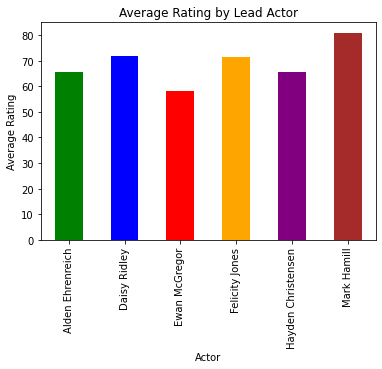

In [68]:
# Determine the best actor
# Graph the data
ActorRatings = df.groupby('Actor')['Average Rating'].mean()
ActorRatings.plot.bar(color=['green', 'blue', 'red', 'orange', 'purple', 'brown'], ylabel='Average Rating', title='Average Rating by Lead Actor')

# Find the primary data
highest = 0
for actor in ActorRatings.keys():
    if ActorRatings[actor] > highest:
        highest = ActorRatings[actor]
        top_actor = actor

# Find the secondary data
size = len(df.loc[df['Actor'] == top_actor])
first = 99999
last = 0
for index, row in df.iterrows():
    if df.Actor[index] == top_actor:
        if df.Year[index] < first:
            first = df.Year[index]
        if df.Year[index] > last:
            last = df.Year[index]

# Print the Results
print(f'The highest rated lead actor is {top_actor}, with an average rating of {highest}% per film')
print(f'Who made {size} films from {first} to {last}')

# Save conclusion data
final_rated = top_actor

### Question: Which actor made the most money?
```
Uses groupby and sum to find the total revenue each actor made
```
* The loop through the groupby actors is used to determine the highest earning lead
* The secondary data is calculated with basic math operators
* The floats are returned to strings to enhance clarity

<p>An actors worth isn't determined just by their acclaim.  They must also make money.  A complete picture of a franchise must include the highest earnings.  The pie chart below displays each actor's percentage of the series's total revenue. Surprisingly, this is often does not correlate with either the best rated actor, nor the actor with highest number of films.  Instead, there is a trend towards higher earnings being associated with more recent actors.  This is because inflation has not been considered.  Despite this, it can still be an insightful analysis because studio desicions are not frequently based on a historical inflation adjusted statistics, but more recent profitable trends.  An unadjusted look at franchise revenue can useful in predicting the artistic direction a franchise may move into in the future. </p>  

The franchise has made: $10,262,413,770
Daisy Ridley made the largest amount: $4,475,298,755
With 3 of 11 films taking in 43.61% of the total revenue


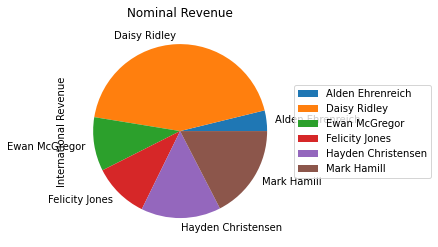

In [69]:
# Find which actor made the most money 
#Create the graph using groupby
ActorRevenue = df.groupby('Actor')['International Revenue'].sum()
ActorRevenue.plot.pie(legend=True, title='Nominal Revenue').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Find the relevant data
highest = 0
for actor in ActorRevenue.keys():
    if ActorRevenue[actor] > highest:
        highest = ActorRevenue[actor]
        top_actor = actor
total = df['International Revenue'].sum()
size = len(df.loc[df['Actor'] == top_actor])
percent = (highest / total) * 100

# Format the data
total = "${:,.0f}".format(total)
highest = "${:,.0f}".format(highest)
percent = "{:,.2f}%".format(percent)

# Print the results
print(f'The franchise has made: {total}')
print(f'{top_actor} made the largest amount: {highest}')
print(f'With {size} of {len(df)} films taking in {percent} of the total revenue')

### Question: Which actor made the most money when adjusted for inflation?
```
Uses groupby and sum to find the adjusted revenue each actor made
```
* The 'bbox_to_anchor' arguement for the plot.pie figure sets the bounding box and takes postions (x, y)

<p>However, there can be no denying the value in the inflation adjusted data.  Here a much stronger correlation can be revealed.  Links between commonality, acclaim and revenue become easy to see.  Adjusting the revenue for inflation paints a much more accurate picture about each lead actors financial data.  Lead actors no longer recieve a benefit simply for portraying their role more recently.  Another interesting comparison is the total revenue against the adjusted revenue.  For a long running or older series, the inflation amount can be significantly higher than the unadjusted amount. The effects of inflation are enourmous over a long time span and simply cannot be ignored. </p>      

The franchise has made: $17,010,153,904 (Inflation Adjusted)
Mark Hamill made the largest amount: $6,540,513,921
With 3 of 11 films taking in 38.45% of the adjusted revenue


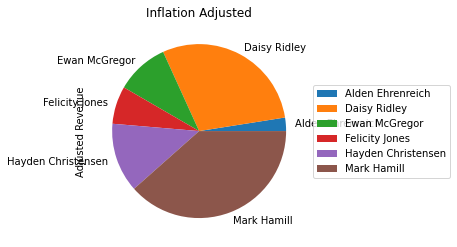

In [70]:
# Find which actor made the most money (inflation adjusted)
#Create the graph using groupby
ActorAdjusted = df.groupby('Actor')['Adjusted Revenue'].sum()
ActorAdjusted.plot.pie(legend=True, title='Inflation Adjusted').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Find the relevant data
highest = 0
for actor in ActorAdjusted.keys():
    if ActorAdjusted[actor] > highest:
        highest = ActorAdjusted[actor]
        top_actor = actor
total = df['Adjusted Revenue'].sum()
size = len(df.loc[df['Actor'] == top_actor])
percent = (highest / total) * 100

# Format the data
total = "${:,.0f}".format(total)
highest = "${:,.0f}".format(highest)
percent = "{:,.2f}%".format(percent)



# Print the results
print(f'The franchise has made: {total} (Inflation Adjusted)')
print(f'{top_actor} made the largest amount: {highest}')
print(f'With {size} of {len(df)} films taking in {percent} of the adjusted revenue')

# Save conclusion data
final_rev = top_actor

### Question: Which lead actor is the best overall?
```
Uses if statements to draw conclusions from previously obtained information
```
* The loop through 'final_mode' is to account for multiple actors with the same number of films
* The 'winner' variable is a boolean set to true if there is a definitive winner
* The conditionals in the if statements are to avoid repeats
<p> A lead actor isn't just how much money they made, the number of films they led or even the critical acclaim they recieved.  The truth is all of those factors matter when conducting a through analysis of a film series.  We will determine the overall best lead actor of a franchise by seeing if any single actor has won a majority of the categories.  If one has, we will declare them the face of the franchise and the best actor to lead it.  However, in the event of a three-way tie, we will leave the desicion up to each individual reader, subjectively; as the data cannot conclusively decide for us.
</p>

In [74]:
# Print the winners
count = 0
for actor in final_mode:
    print(f'The lead actor who starred in the most films: {final_mode[count]}')
    count = count + 1
print(f'The lead actor who scored the highest ratings: {final_rated}')
print(f'The lead actor who earned the most adjusted revenue: {final_rev}')

# Analyze the winners to determine the best overall
print('-------------------------------------------------------------------')
winner = False
count = 0
for actor in final_mode:
    if (final_mode[count] == final_rated) or (final_mode[count] == final_rev):
        print(f'{final_mode[count]} is objectively the best lead actor')
        winner = True
    count = count + 1
if final_rev == final_rated and winner == False:
    print(f'{final_rev} is objectively the best lead actor')
    winner = True
if winner == False:
    print(f'There is no objectively best lead actor, it is a subjective desicion')

The lead actor who starred in the most films: Daisy Ridley
The lead actor who starred in the most films: Mark Hamill
The lead actor who scored the highest ratings: Mark Hamill
The lead actor who earned the most adjusted revenue: Mark Hamill
-------------------------------------------------------------------
Mark Hamill is objectively the best actor
